In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv("C:/Users/Sarthak Sharma/Desktop/Python/SA Hackathon 2/Test_Data.csv")
train = pd.read_csv("C:/Users/Sarthak Sharma/Desktop/Python/SA Hackathon 2/Train_Data.csv")

In [3]:
train['age_group'] = train['age_group'].map({'Adult': 0, 'Senior': 1})

In [4]:
print(train.isnull().sum())
print('train_shape:', train.shape)
print('no. of adult:', train[train.age_group == 0].shape )
print('no. of senior:', train[train.age_group == 1].shape )
train.describe()
train_drop = train.copy()

SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64
train_shape: (1966, 9)
no. of adult: (1638, 9)
no. of senior: (314, 9)


In [5]:
for col in ['RIAGENDR', 'DIQ010', 'PAQ605']:
    mode_val = train_drop[col].mode()[0]
    train_drop[col].fillna(mode_val, inplace=True)
for col in ['LBXGLU', 'LBXGLT', 'LBXIN', 'BMXBMI']:
    median_val = train_drop[col].median()
    train_drop[col].fillna(median_val, inplace=True)

C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\1214959316.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_drop[col].fillna(mode_val, inplace=True)
C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\1214959316.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [6]:

train_drop = train_drop.drop(['SEQN'], axis = 1)
train_drop = train_drop.dropna()
print('train_shape:', train_drop.shape)
print('no. of adult:', train_drop[train_drop.age_group == 0].shape )
print('no. of senior:', train_drop[train_drop.age_group == 1].shape )
train_drop.describe()

train_shape: (1952, 8)
no. of adult: (1638, 8)
no. of senior: (314, 8)


,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,1.513832,1.826844,27.970236,99.449795,2.015369,115.013320,11.862147,0.160861
std,0.499937,0.398275,7.310772,16.683920,0.186058,46.009791,9.758473,0.367497
min,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000,0.000000
25%,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000,0.000000
50%,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000,0.000000
75%,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.472500,0.000000
max,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000,1.000000


In [7]:
(train_drop[train_drop['PAQ605']==7]) #only one entry

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
359,1.0,7.0,21.1,110.0,2.0,66.0,4.24,0.0


In [8]:
train_drop['PAQ605'] = train_drop['PAQ605'].apply(lambda x: 1 if x == 1 else 0)
train_drop['insulin_bmi_ratio'] = train_drop['LBXIN'] / train_drop['BMXBMI']
train_drop['bmi_insulin_product'] = train_drop['BMXBMI'] * train_drop['LBXIN']
train_drop['glucose_ratio'] = train_drop['LBXGLU'] / (train_drop['LBXGLT'])
train_drop['glucose_sum'] = train_drop['LBXGLU'] + train_drop['LBXGLT']
train_drop['glucose_diff'] = train_drop['LBXGLU'] - train_drop['LBXGLT']
#train_drop = train_drop.drop(['BMXBMI','LBXIN'], axis = 1)

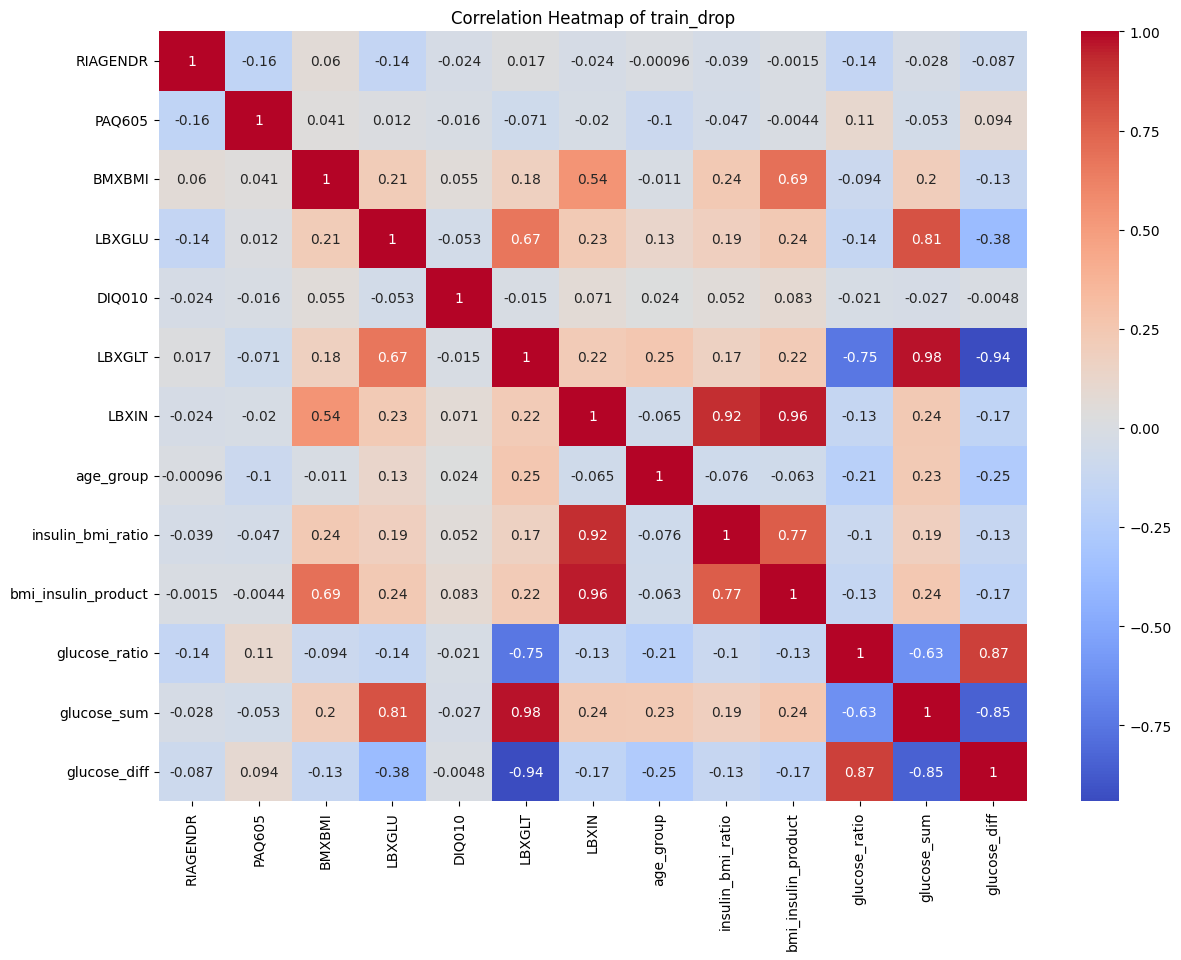

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(train_drop.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of train_drop')
plt.show()

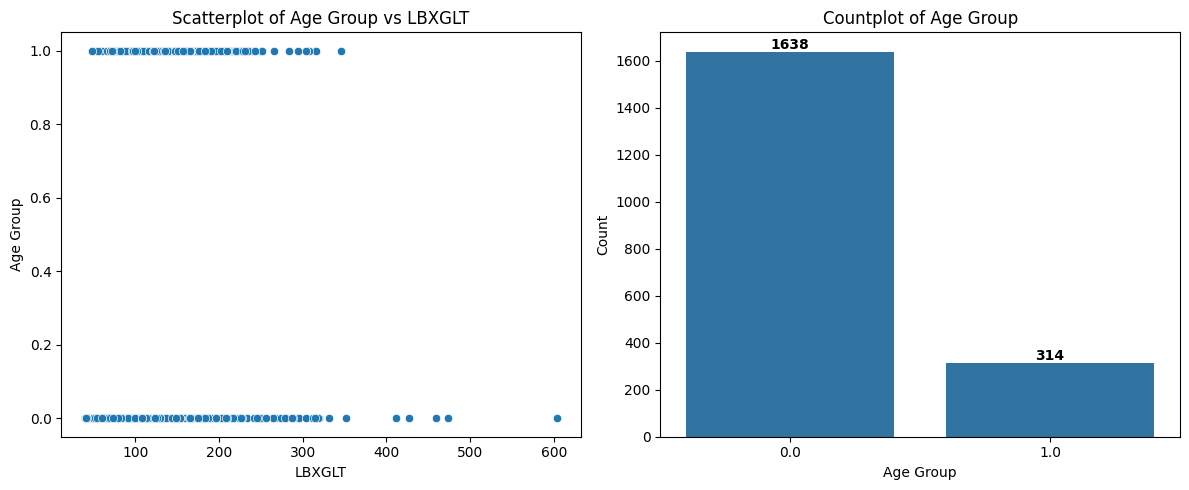

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=train_drop, x='LBXGLT', y='age_group', ax=axes[0],)
axes[0].set_xlabel('LBXGLT')
axes[0].set_ylabel('Age Group')
axes[0].set_title('Scatterplot of Age Group vs LBXGLT')

countplot = sns.countplot(data=train_drop, x='age_group', ax=axes[1])
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].set_title('Countplot of Age Group')

for p in countplot.patches:
    count = int(p.get_height())
    axes[1].annotate(str(count), (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\3436224908.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='age_group', x=col, data=train_drop, orient='h', palette='Set2')
C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\3436224908.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='age_group', x=col, data=train_drop, orient='h', palette='Set2')
C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\3436224908.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='age_group', x=col, data=train_drop, orien

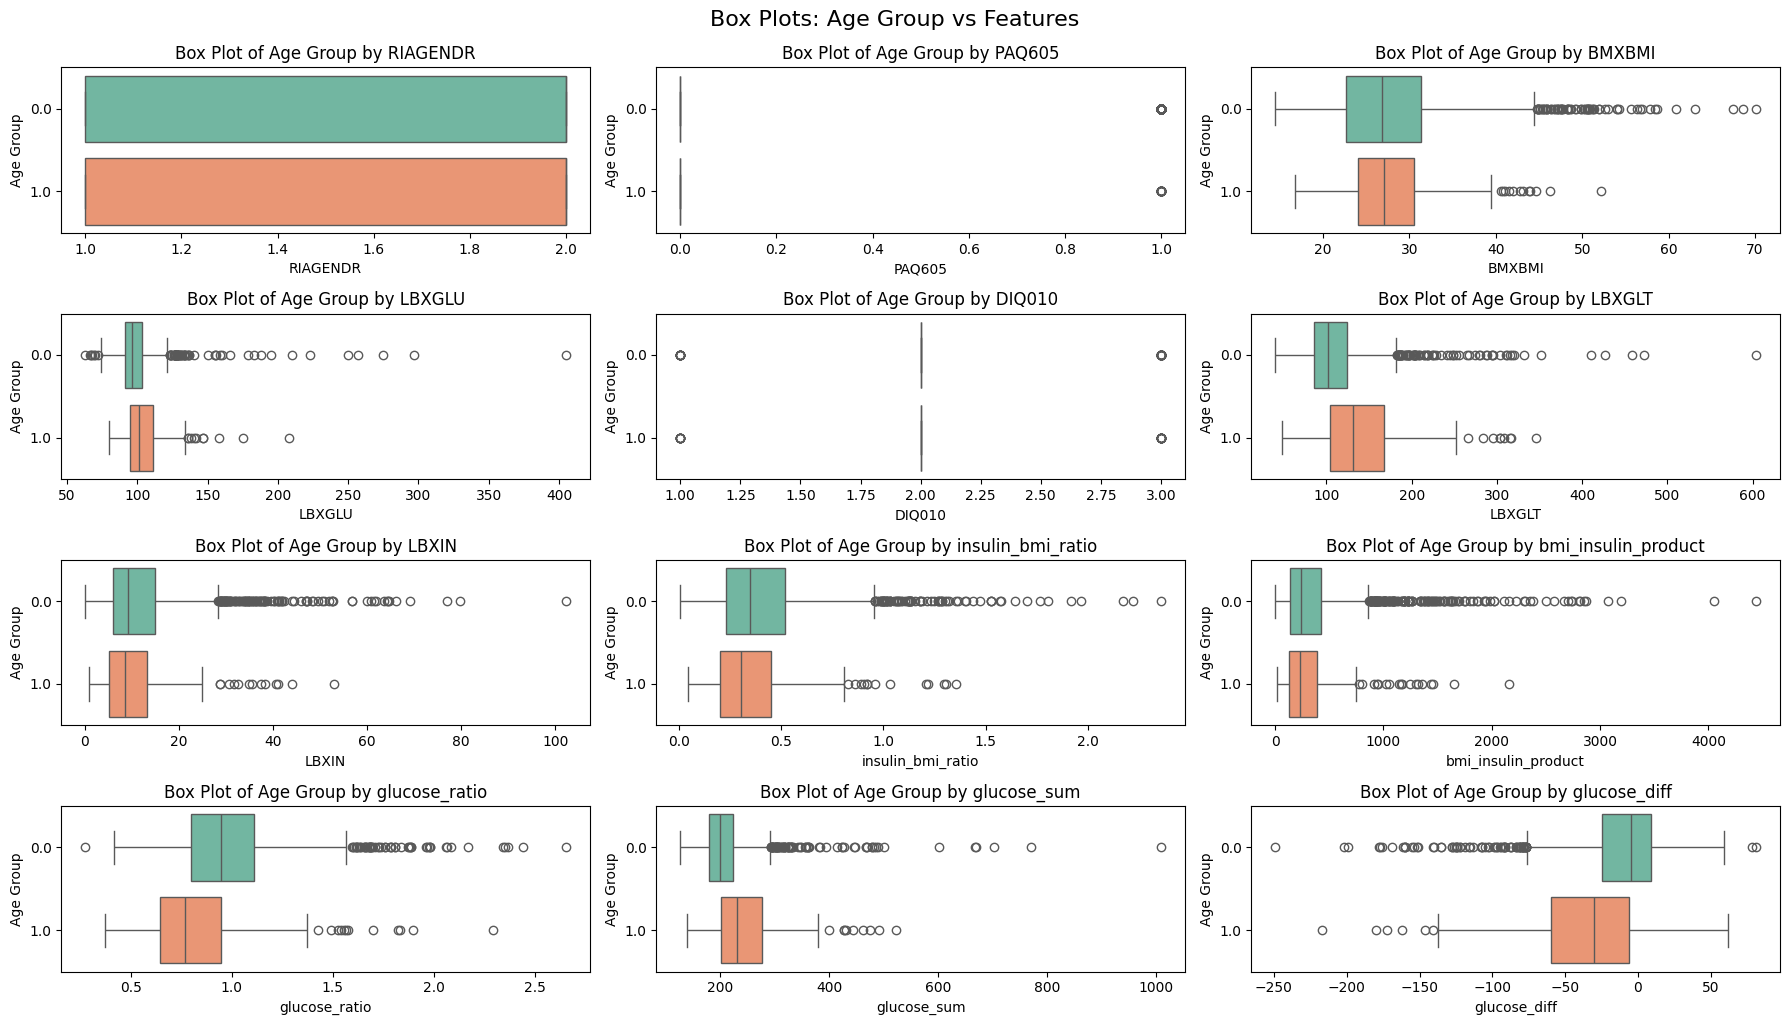

In [11]:
import math

# Get numeric columns from train_drop
numeric_cols = train_drop.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(18, 10))
n_cols = 3
n_rows = math.ceil((len(numeric_cols) - 1) / n_cols)
plot_features = [col for col in numeric_cols if col != 'age_group']

for i, col in enumerate(plot_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y='age_group', x=col, data=train_drop, orient='h', palette='Set2')
    plt.title(f'Box Plot of Age Group by {col}')
    plt.ylabel('Age Group')
    plt.xlabel(col)
plt.tight_layout()
plt.suptitle('Box Plots: Age Group vs Features', y=1.02, fontsize=16)
plt.show()


C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\4097954202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='age_group', x=col, data=train_drop, orient='h', palette='Set2')
C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\4097954202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='age_group', x=col, data=train_drop, orient='h', palette='Set2')
C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\4097954202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='age_group', x=col, data=train_drop,

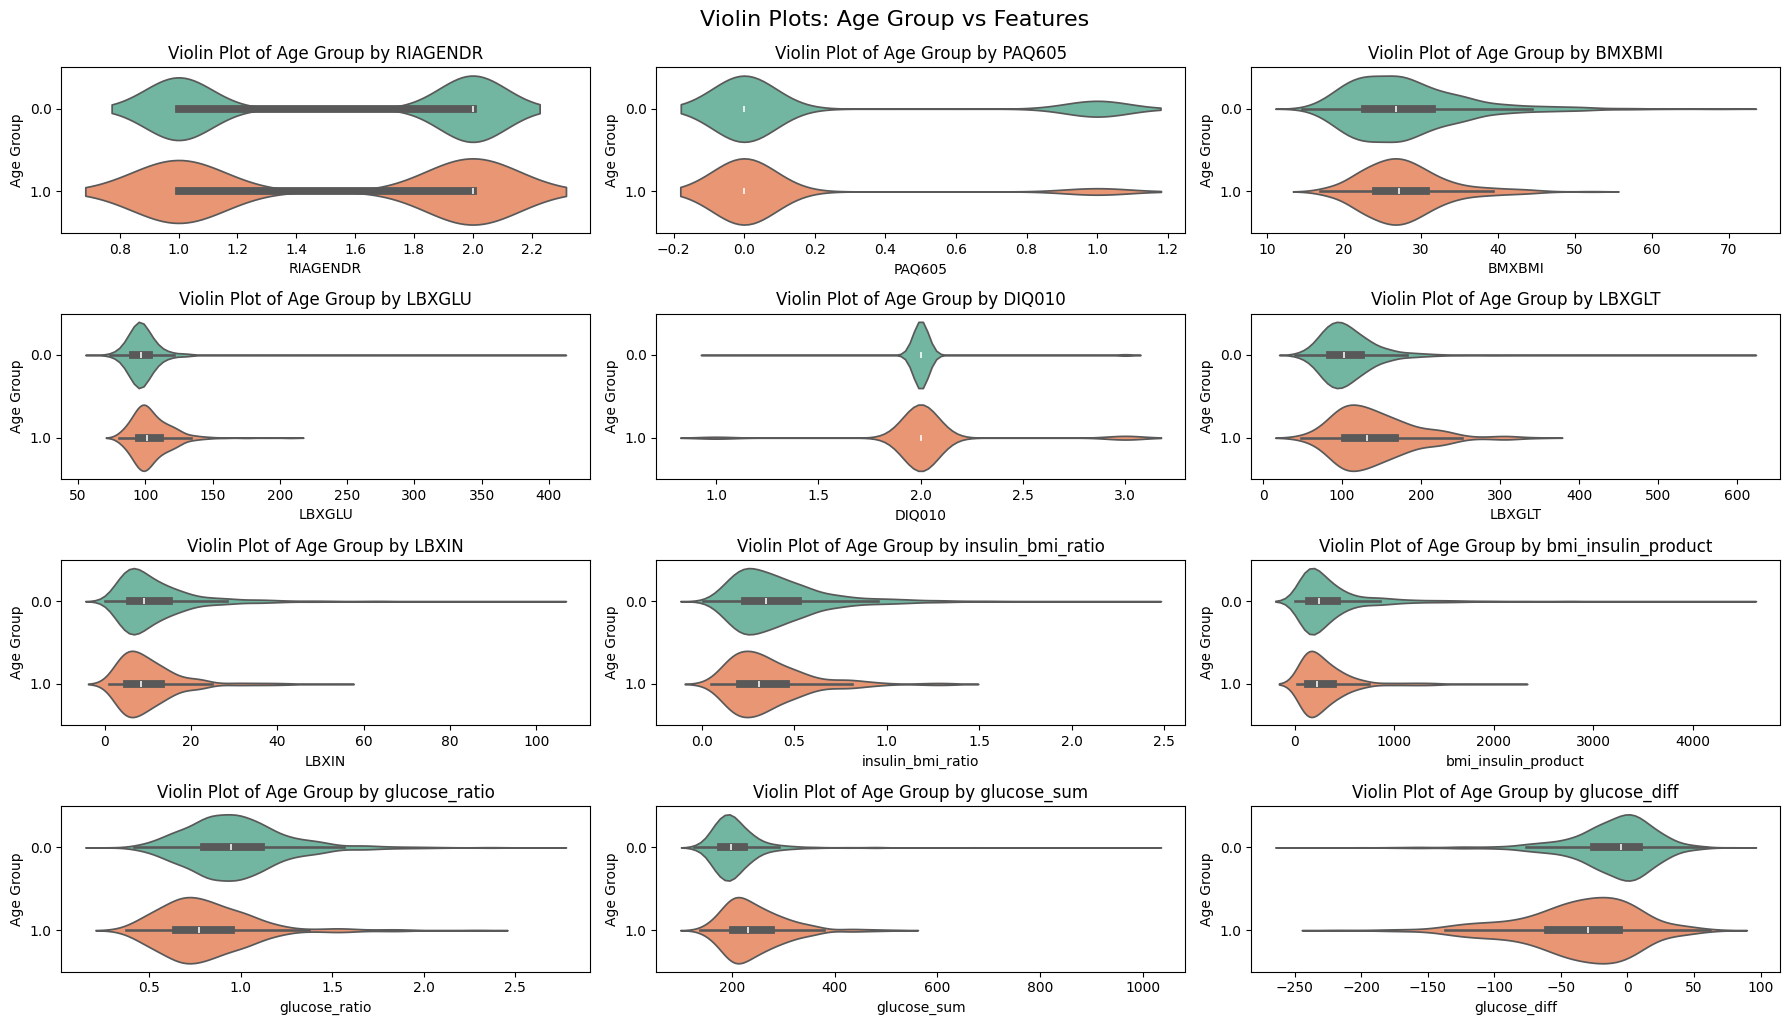

In [12]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(plot_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(y='age_group', x=col, data=train_drop, orient='h', palette='Set2')
    plt.title(f'Violin Plot of Age Group by {col}')
    plt.ylabel('Age Group')
    plt.xlabel(col)
plt.tight_layout()
plt.suptitle('Violin Plots: Age Group vs Features', y=1.02, fontsize=16)
plt.show()

In [13]:
train_drop

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,insulin_bmi_ratio,bmi_insulin_product,glucose_ratio,glucose_sum,glucose_diff
0,2.0,0,35.7,110.0,2.0,150.0,14.91,0.0,0.417647,532.287,0.733333,260.0,-40.0
1,2.0,0,20.3,89.0,2.0,80.0,3.85,0.0,0.189655,78.155,1.112500,169.0,9.0
2,1.0,0,23.2,89.0,2.0,68.0,6.14,0.0,0.264655,142.448,1.308824,157.0,21.0
3,1.0,0,28.9,104.0,2.0,84.0,16.15,0.0,0.558824,466.735,1.238095,188.0,20.0
4,2.0,1,35.9,103.0,2.0,81.0,10.92,0.0,0.304178,392.028,1.271605,184.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2.0,0,33.5,100.0,2.0,73.0,6.53,0.0,0.194925,218.755,1.369863,173.0,27.0
1962,1.0,0,30.0,93.0,2.0,208.0,13.02,0.0,0.434000,390.600,0.447115,301.0,-115.0
1963,1.0,0,23.7,103.0,2.0,124.0,21.41,0.0,0.903376,507.417,0.830645,227.0,-21.0
1964,2.0,0,27.4,90.0,2.0,108.0,4.99,0.0,0.182117,136.726,0.833333,198.0,-18.0


In [14]:
from sklearn.model_selection import train_test_split
X = train_drop.drop('age_group', axis = 1)
y = train_drop['age_group']
X.drop(['glucose_ratio', 'LBXGLU', 'LBXGLT'] , axis = 1, inplace = True)
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)

In [15]:
cols = ['glucose_sum', 'bmi_insulin_product', 'insulin_bmi_ratio', 'glucose_diff']
p5 = X_train[cols].quantile(0.05)
p95 = X_train[cols].quantile(0.95)
X_train[cols] = X_train[cols].clip(lower=p5, upper=p95, axis=1)
X_val[cols] = X_val[cols].clip(lower=p5, upper=p95, axis=1)

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
cat_cols = ['RIAGENDR', 'DIQ010', 'PAQ605']

for col in cat_cols:
    X_train_smote[col] = X_train_smote[col].round().astype(int)

print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE class distribution:\n", y_train_smote.value_counts())

Original class distribution:
 age_group
0.0    1324
1.0     237
Name: count, dtype: int64
After SMOTE class distribution:
 age_group
0.0    1324
1.0    1324
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=40, C = 0.5, solver='saga', penalty = 'l2')
lr_model.fit(X_train_scaled, y_train_smote)

y_val_pred = lr_model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.6982
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.69      0.79       314
         1.0       0.36      0.71      0.48        77

    accuracy                           0.70       391
   macro avg       0.64      0.70      0.63       391
weighted avg       0.80      0.70      0.73       391



In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.5, 1, 1.2,1.4 ],
    'max_iter': [40, 50, 30, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train_smote)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found: {'C': 0.5, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.7217024360806078


In [20]:
from sklearn.metrics import classification_report, accuracy_score

def test_model(model, X_train, X_val, y_train, y_val):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    print(f"\nAccuracy {model}: {acc:.4f}")

    print(f"\nClassification Report {model}:")
    print(classification_report(y_val, y_pred))

In [21]:
from sklearn.model_selection import train_test_split
X2_train, X2_val, y2_train, y2_val = train_test_split(X,y, test_size = 0.2)

X2_train_smote, y2_train_smote = smote.fit_resample(X2_train, y2_train)
cat_cols = ['RIAGENDR', 'DIQ010', 'PAQ605']

for col in cat_cols:
    X2_train_smote[col] = X2_train_smote[col].round().astype(int)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
rf = RandomForestClassifier(bootstrap = True, max_depth = None, min_samples_leaf =1, min_samples_split = 2, n_estimators = 200, class_weight = 'balanced')
xgb = XGBClassifier(n_estimatiors = 200, learning_rate = 0.1, colsample_bytree = 0.8, max_depth = 5, subsample = 0.8, class_weight = 'balanced')
catb = CatBoostClassifier(depth = 7 , iterations = 300, l2_leaf_reg = 1, learning_rate = 0.1)
vec = SVC(C = 1.5, degree = 2, gamma = 'scale', kernel = 'rbf')

In [23]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators=80,
    learning_rate=0.02,
    max_depth=3,
    class_weight='balanced',
    num_leaves = 30,
    random_state=42)

In [24]:
params = {
    'n_estimators': [100, 80],
    'learning_rate': [0.02, 0.025, 0.03],
    'num_leaves': [30, 20],
    'max_depth': [4, 3,2]
}
grid = GridSearchCV(
    estimator=lgb_model,
    param_grid=params,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

print("Best parameters found for LightGBM:", grid.best_params_)
print("Best cross-validation F1 score:", grid.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 237, number of negative: 1324
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [25]:
# # Hyperparameter tuning for CatBoostClassifier
# catb_param_grid = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [3, 5, 7],
#     'l2_leaf_reg': [1, 3, 5]
# }

# catb_grid_search = GridSearchCV(
#     estimator=catb,
#     param_grid=catb_param_grid,
#     scoring='f1',
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# catb_grid_search.fit(X2_train_smote, y2_train_smote)
# print("Best parameters found for CatBoost:", catb_grid_search.best_params_)
# print("Best cross-validation F1 score:", catb_grid_search.best_score_)

# # Hyperparameter tuning for RandomForestClassifier
# rf_param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# rf_grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=rf_param_grid,
#     scoring='f1',
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# rf_grid_search.fit(X2_train_smote, y2_train_smote)
# print("Best parameters found for Random Forest:", rf_grid_search.best_params_)
# print("Best cross-validation F1 score:", rf_grid_search.best_score_)

In [26]:
svc_param_grid = {
    'C': [0.1, 1,1.2, 1.5],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

svc_grid_search = GridSearchCV(
    estimator=vec,
    param_grid=svc_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

svc_grid_search.fit(X_train_scaled, y_train_smote)

print("Best parameters found for SVC:", svc_grid_search.best_params_)
print("Best cross-validation F1 score:", svc_grid_search.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters found for SVC: {'C': 1.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation F1 score: 0.7733105509861569


In [27]:
test_model(vec, X_train_scaled, X_val_scaled, y_train_smote, y_val)
test_model(lgb_model, X2_train_smote, X_val, y2_train_smote, y_val)


Accuracy SVC(C=1.5, degree=2): 0.6624

Classification Report SVC(C=1.5, degree=2):
              precision    recall  f1-score   support

         0.0       0.90      0.65      0.76       314
         1.0       0.33      0.71      0.45        77

    accuracy                           0.66       391
   macro avg       0.62      0.68      0.61       391
weighted avg       0.79      0.66      0.70       391

[LightGBM] [Info] Number of positive: 1306, number of negative: 1306
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1539
[LightGBM] [Info] Number of data points in the train set: 2612, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [28]:
test_model(rf, X2_train_smote, X_val, y2_train_smote, y_val)
test_model(xgb, X2_train_smote, X_val, y2_train_smote, y_val)
test_model(catb, X2_train_smote, X_val, y2_train_smote, y_val)


Accuracy RandomForestClassifier(class_weight='balanced', n_estimators=200): 0.9361

Classification Report RandomForestClassifier(class_weight='balanced', n_estimators=200):
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       314
         1.0       0.82      0.86      0.84        77

    accuracy                           0.94       391
   macro avg       0.89      0.91      0.90       391
weighted avg       0.94      0.94      0.94       391


Accuracy XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
        

c:\Users\Sarthak Sharma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:14:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "n_estimatiors" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0:	learn: 0.6546779	total: 150ms	remaining: 45s
1:	learn: 0.6215651	total: 155ms	remaining: 23s
2:	learn: 0.5995210	total: 159ms	remaining: 15.7s
3:	learn: 0.5856136	total: 161ms	remaining: 11.9s
4:	learn: 0.5690553	total: 164ms	remaining: 9.67s
5:	learn: 0.5579620	total: 167ms	remaining: 8.17s
6:	learn: 0.5444372	total: 170ms	remaining: 7.1s
7:	learn: 0.5348696	total: 173ms	remaining: 6.31s
8:	learn: 0.5235853	total: 177ms	remaining: 5.71s
9:	learn: 0.5134739	total: 180ms	remaining: 5.23s
10:	learn: 0.5076112	total: 184ms	remaining: 4.82s
11:	learn: 0.4994076	total: 187ms	remaining: 4.48s
12:	learn: 0.4903013	total: 191ms	remaining: 4.21s
13:	learn: 0.4856846	total: 193ms	remaining: 3.95s
14:	learn: 0.4797691	total: 197ms	remaining: 3.75s
15:	learn: 0.4747236	total: 201ms	remaining: 3.56s
16:	learn: 0.4691293	total: 204ms	remaining: 3.39s
17:	learn: 0.4650864	total: 207ms	remaining: 3.25s
18:	learn: 0.4605120	total: 210ms	remaining: 3.1s
19:	learn: 0.4565838	total: 212ms	remaining: 2.

In [29]:
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

xgb_grid_search.fit(X_train, y_train)

print("Best parameters found for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation F1 score:", xgb_grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation F1 score: 0.2281811612588532


c:\Users\Sarthak Sharma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:14:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "n_estimatiors" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [30]:
test.isnull().sum()

SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

In [31]:
test[test.isnull().any(axis=1)]

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
15,79577.0,2.0,2.0,25.1,97.0,2.0,NaN,13.34
30,82423.0,1.0,1.0,30.2,105.0,2.0,85.0,NaN
43,NaN,1.0,2.0,21.7,92.0,2.0,74.0,6.83
44,77440.0,NaN,2.0,27.5,90.0,2.0,97.0,10.32
68,74056.0,1.0,1.0,29.9,103.0,NaN,92.0,8.07
158,74938.0,2.0,2.0,27.1,95.0,2.0,NaN,12.36
178,82771.0,NaN,2.0,36.8,106.0,2.0,131.0,8.22
216,80693.0,1.0,NaN,21.8,93.0,2.0,69.0,3.56
232,82354.0,2.0,2.0,49.0,NaN,2.0,163.0,32.21
299,77331.0,1.0,2.0,NaN,89.0,2.0,66.0,5.75


In [32]:
# Impute categorical columns with mode
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    mode_val = test[col].mode()[0]
    test[col].fillna(mode_val, inplace=True)

# Impute numerical columns with median
for col in ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']:
    median_val = test[col].median()
    test[col].fillna(median_val, inplace=True)

C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\2574051519.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(mode_val, inplace=True)
C:\Users\Sarthak Sharma\AppData\Local\Temp\ipykernel_26972\2574051519.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [33]:
test['PAQ605'] = test['PAQ605'].apply(lambda x: 1 if x == 1 else 0)
test['insulin_bmi_ratio'] = test['LBXIN'] / test['BMXBMI']
test['bmi_insulin_product'] = test['BMXBMI'] * test['LBXIN']
test['glucose_ratio'] = test['LBXGLU'] / (test['LBXGLT'])
test['glucose_sum'] = test['LBXGLU'] + test['LBXGLT']
test['glucose_diff'] = test['LBXGLU'] - test['LBXGLT']
#test = test.drop(['BMXBMI','LBXIN'], axis = 1)
test = test.drop(['glucose_ratio', 'LBXGLU', 'LBXGLT'] , axis = 1)

In [34]:
test_final = test.drop(['SEQN'], axis=1)

In [35]:
X_train_smote

,RIAGENDR,PAQ605,BMXBMI,DIQ010,LBXIN,insulin_bmi_ratio,bmi_insulin_product,glucose_sum,glucose_diff
0,2,0,32.500000,2,4.740000,0.145846,154.050000,187.000000,-7.000000
1,1,0,27.700000,2,6.240000,0.225271,172.848000,226.000000,-26.000000
2,2,1,30.400000,2,9.600000,0.315789,291.840000,201.000000,5.000000
3,2,1,30.900000,2,11.520000,0.372816,355.968000,235.000000,-47.000000
4,1,0,50.300000,2,29.010000,0.576740,1193.494000,205.000000,-17.000000
...,...,...,...,...,...,...,...,...,...
2643,2,0,27.188935,2,5.092764,0.187395,138.425665,193.000000,6.110653
2644,2,0,28.100827,2,15.471218,0.554871,432.793868,211.405992,-31.722110
2645,1,0,22.113724,2,2.602552,0.138990,68.381966,200.551823,-4.966408
2646,1,0,25.537746,2,8.081538,0.316663,206.282133,215.209303,-18.586762


In [36]:
test_final[cols] = test_final[cols].clip(lower=p5, upper=p95, axis=1)
test_scaled = scaler.transform(test_final)

In [ ]:
# Predict age_group for the test set and store as a pandas Series
submission = pd.Series(vec.predict(test_scaled), name='age_group')
#support vector machine gave best result

In [41]:
submission

0      0.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
307    0.0
308    0.0
309    1.0
310    0.0
311    1.0
Name: age_group, Length: 312, dtype: float64

In [42]:
submission.to_csv("submission.csv", index=False)